In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

In [2]:
pubchem_active = pd.read_csv('./../datasets/2_preprocessed/pubchem_preprocessed_active.csv')
pubchem_inactive = pd.read_csv('./../datasets/2_preprocessed/pubchem_preprocessed_inactive.csv')
chembl_active = pd.read_csv('./../datasets/2_preprocessed/chembl_preprocessed_active.csv')
chembl_inactive = pd.read_csv('./../datasets/2_preprocessed/chembl_preprocessed_inactive.csv')

In [3]:
set1 = set(pubchem_active['preprocessedSmiles'].tolist())
set2 = set(chembl_active['preprocessedSmiles'].tolist())

In [4]:
def venn_diagram(set1, set2, set1_name, set2_name):
    plt.figure(figsize=(8, 8))  # Optional: Adjusts the figure size
    venn = venn2([set1, set2], (set1_name, set2_name))
    overlapping_area = set1 & set2  
    # Print the content of the overlapping area
    print("Overlapping area contains:", overlapping_area)
    # Increase the font size of the labels and numbers
    for text in venn.set_labels:
        text.set_fontsize(20)  
    for text in venn.subset_labels:
        text.set_fontsize(20)  
    venn.get_patch_by_id('10').set_color('orchid')
    venn.get_patch_by_id('01').set_color('teal')
    venn.get_patch_by_id('11').set_color('lightgrey')
    plt.show()


Overlapping area contains: {'Clc1cccc(C(c2ccc3[nH]cnc3c2)n2ccnc2)c1', 'C=C1CC2C(CCC3(C)C(=O)CCC23)C2(C)C=CC(=O)C=C12', 'Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1', 'Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1', 'CC(C)(C#N)c1cc(Cn2cncn2)cc(C(C)(C)C#N)c1'}


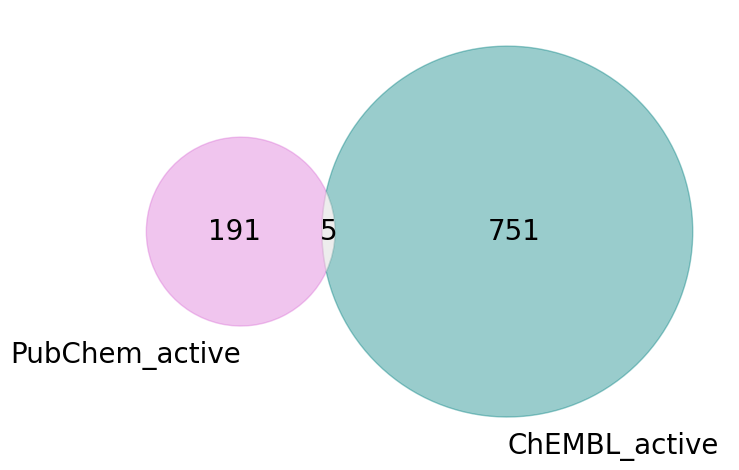

In [5]:
set1 = set(pubchem_active['preprocessedSmiles'].tolist())
set2 = set(chembl_active['preprocessedSmiles'].tolist())
venn_diagram(set1, set2, 'PubChem_active', 'ChEMBL_active')

Overlapping area contains: {'CS(=O)(=O)Nc1ccc([N+](=O)[O-])cc1Oc1ccccc1', 'CCC=CCC=CCC=CCC=CCC=CCCCC(=O)O', 'CCCCCC=CCC=CCCCCCCCC(=O)O', 'CCCCCCCCC=CCCCCCCCC(=O)O', 'CCC=CCC=CCC=CCC=CCC=CCC=CCCC(=O)O', 'CCC(C(C)O)n1ncn(-c2ccc(N3CCN(c4ccc(OCC5COC(Cn6cncn6)(c6ccc(F)cc6F)C5)cc4)CC3)cc2)c1=O', 'OC(Cn1cncn1)(Cn1cncn1)c1ccc(F)cc1F'}


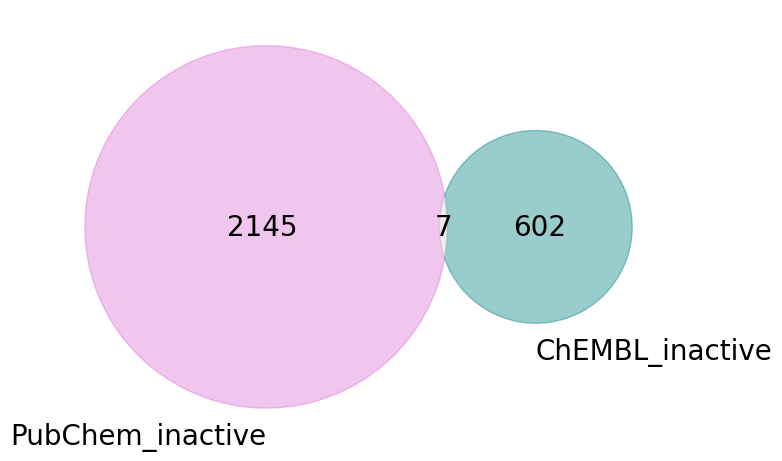

In [6]:
set1 = set(pubchem_inactive['preprocessedSmiles'].tolist())
set2 = set(chembl_inactive['preprocessedSmiles'].tolist())
venn_diagram(set1, set2, 'PubChem_inactive', 'ChEMBL_inactive')

Overlapping area contains: set()


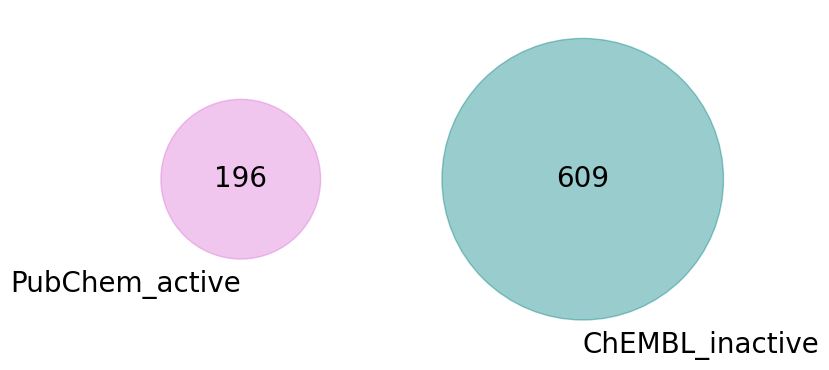

In [8]:
set1 = set(pubchem_active['preprocessedSmiles'].tolist())
set2 = set(chembl_inactive['preprocessedSmiles'].tolist())
plt.figure(figsize=(8, 8))  # Optional: Adjusts the figure size

venn = venn2([set1, set2], ('PubChem_active', 'ChEMBL_inactive'))
overlapping_area = set1 & set2  
# Print the content of the overlapping area
print("Overlapping area contains:", overlapping_area)
# Increase the font size of the labels and numbers
for text in venn.set_labels:
    text.set_fontsize(20)  
for text in venn.subset_labels[:2]:
    text.set_fontsize(20)  
venn.get_patch_by_id('10').set_color('orchid')
venn.get_patch_by_id('01').set_color('teal')
plt.show()

In [10]:
venn.subset_labels

[Text(-0.9018688872589061, 0.0, '196'),
 Text(0.2902566533706824, 0.0, '609'),
 None]

Overlapping area contains: {'CC(Cc1ccc(O)c(O)c1)C(C)Cc1ccc(O)c(O)c1'}


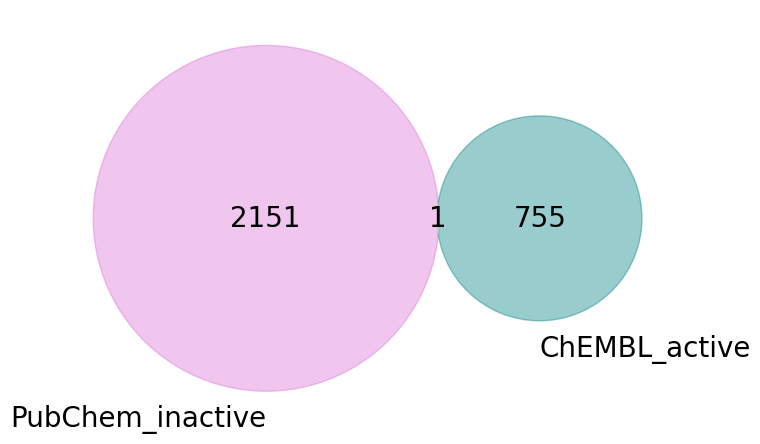

In [9]:
set1 = set(pubchem_inactive['preprocessedSmiles'].tolist())
set2 = set(chembl_active['preprocessedSmiles'].tolist())
venn_diagram(set1, set2, 'PubChem_inactive', 'ChEMBL_active')

In [12]:
#print the structure of molecule that is in the overlapping area
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

smiles = 'CC(Cc1ccc(O)c(O)c1)C(C)Cc1ccc(O)c(O)c1'
mol = Chem.MolFromSmiles(smiles)
image = Draw.MolToImage(mol)
image.show()

Overlapping area contains: {'CC(C)(C#N)c1cc(Cn2cncn2)cc(C(C)(C)C#N)c1', 'Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1', 'Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1', 'C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C@@]2(C)C=CC(=O)C=C12', 'N#Cc1ccc(C(c2ccc(C#N)cc2)n2cncn2)cc1', 'Clc1cccc(C(c2ccc3[nH]cnc3c2)n2ccnc2)c1'}


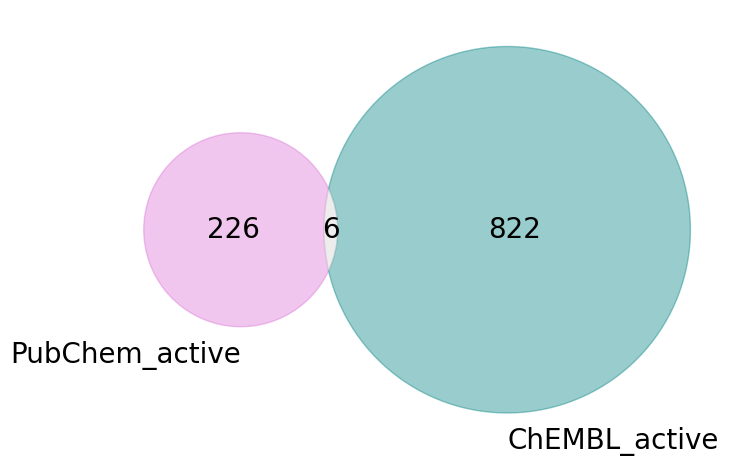

In [ ]:

# Create the Venn diagram
plt.figure(figsize=(8, 8))  # Optional: Adjusts the figure size
venn = venn2([set1, set2], ('PubChem_active', 'ChEMBL_active'))
overlapping_area = set1 & set2  
# Print the content of the overlapping area
print("Overlapping area contains:", overlapping_area)

# Increase the font size of the labels and numbers
for text in venn.set_labels:
    text.set_fontsize(20)  # Adjust the size as needed
for text in venn.subset_labels:
    text.set_fontsize(20)  # Adjust the size as needed

venn.get_patch_by_id('10').set_color('orchid')
#venn.get_patch_by_id('10').set_edgecolor('black')
venn.get_patch_by_id('01').set_color('teal')
#venn.get_patch_by_id('01').set_edgecolor('black')
venn.get_patch_by_id('11').set_color('lightgrey')
#venn.get_patch_by_id('11').set_edgecolor('black')
plt.show()
